In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os

try:
    os.chdir(os.path.dirname(os.path.realpath(__file__)))
except:
    pass

def geodataframefromcsvfile(filelocation:str) -> gpd.GeoDataFrame:
    return pd.read_csv(
        filelocation,
        parse_dates=['date_occ', 'date_rptd'],
        na_filter=False,
    )

signs = pd.read_csv(
        '../Data/2-refined-data/refined-sign-data.csv',
        parse_dates=['last_seen_at'],
        na_filter=False,
    )
roadfeatures = pd.read_csv(
        '../Data/2-refined-data/refined-road-data.csv',
        parse_dates=['last_seen_at'],
        na_filter=False,
    )
collisions = pd.read_csv(
        '../Data/2-refined-data/refined-collision-data.csv',
        parse_dates=['date_occ', 'date_rptd'],
        na_filter=False,
    )

In [13]:
nearbycouncils=[
        'GREATER WILSHIRE NC',
        'CENTRAL HOLLYWOOD NC',
        'HOLLYWOOD STUDIO DISTRICT NC',
        'MID CITY WEST CC',
        'OLYMPIC PARK NC',
        'P.I.C.O. NC',
        'WILSHIRE CENTER - KOREATOWN NC'
    ]

relevantmocodes = {
    '3003': 'Veh vs Ped',
    '3008': 'Veh vs Bike',
    '3016': 'Bike vs Veh',
    '3501': 'Ped Actions'
}

In [3]:
yearlycollisions = collisions.groupby(collisions['date_occ'].dt.year)

<AxesSubplot:title={'center':'Collisions by Neighborhood Council'}>

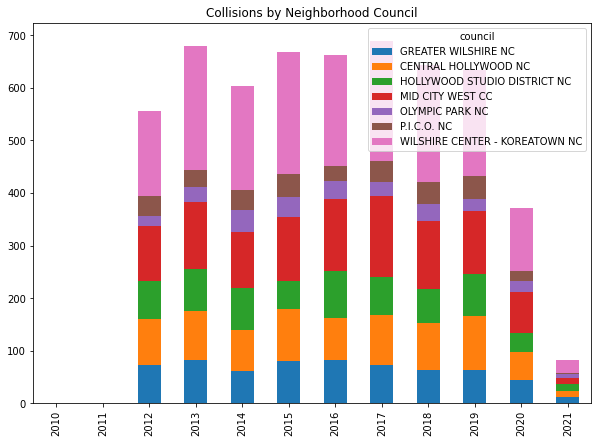

In [48]:
ncyearly = yearlycollisions['council'].value_counts().unstack()
ncyearly[nearbycouncils].plot.bar(title="Pedestrian and Bike Collisions by Neighborhood Council", stacked=True, figsize=(10,7), xlabel='')

<AxesSubplot:title={'center':'Collisions by time of day - Greater Wilshire'}>

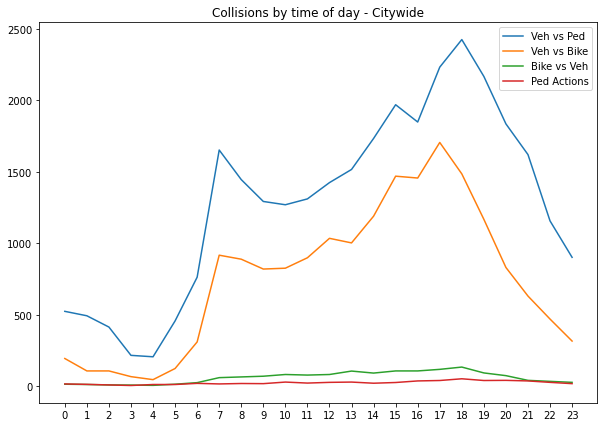

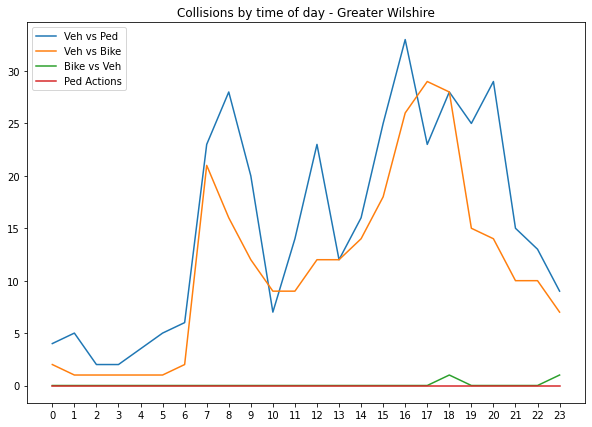

In [60]:
timeofday = collisions.groupby(collisions['date_occ'].dt.hour)
timeofday[[
    'Veh vs Ped',
    'Veh vs Bike',
    'Bike vs Veh',
    'Ped Actions'
    ]].sum().plot(
        title='Collisions by Time of Day - Citywide',
        xlabel='', xticks=range(0, 24), figsize=(10,7)
    )

timeofday = collisions[collisions['council'] == 'GREATER WILSHIRE NC'].groupby(collisions['date_occ'].dt.hour)
timeofday[[
    'Veh vs Ped',
    'Veh vs Bike',
    'Bike vs Veh',
    'Ped Actions'
    ]].sum().plot(
        title='Collisions by Time of Day - Greater Wilshire',
        xlabel='', xticks=range(0, 24), figsize=(10,7)
    )

In [58]:
locations = collisions[collisions['council'] == "GREATER WILSHIRE NC"].copy()
locations['geometry'].unique()

array(['POINT (-118.3386 34.0689)', 'POINT (-118.3276 34.0619)',
       'POINT (-118.3114 34.0763)', 'POINT (-118.344 34.0689)',
       'POINT (-118.3429 34.0689)', 'POINT (-118.3372 34.0649)',
       'POINT (-118.3157 34.0763)', 'POINT (-118.3113 34.0731)',
       'POINT (-118.3202 34.0618)', 'POINT (-118.3291 34.062)',
       'POINT (-118.322 34.0564)', 'POINT (-118.3142 34.0559)',
       'POINT (-118.3258 34.0619)', 'POINT (-118.3348 34.0621)',
       'POINT (-118.3142 34.069)', 'POINT (-118.323 34.0547)',
       'POINT (-118.3193 34.0543)', 'POINT (-118.3397 34.0835)',
       'POINT (-118.3406 34.0819)', 'POINT (-118.3393 34.0726)',
       'POINT (-118.3199 34.0556)', 'POINT (-118.3329 34.061)',
       'POINT (-118.3258 34.0671)', 'POINT (-118.3336 34.0689)',
       'POINT (-118.3101 34.0581)', 'POINT (-118.3116 34.0654)',
       'POINT (-118.3153 34.0725)', 'POINT (-118.3406 34.0835)',
       'POINT (-118.3143 34.0545)', 'POINT (-118.3272 34.0817)',
       'POINT (-118.3153 34.061